In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)

%matplotlib inline

In [2]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target


In [3]:
estimators = [('k_means_8', KMeans(n_clusters=8)),#KMeans的使用時機就在於～你根本不知道測試的資料有什麼特性的時候就是用他的時候了
              ('k_means_3', KMeans(n_clusters=3)), #KMeans這個函數的分類數量用 n_clusters 這個去算 
              ('k_means_bad_init', KMeans(n_clusters=4, n_init=2,
                                               init='random'))]#Kmeans會預設十個隨機起始點 (n_init=10)，在預設的情況(n_job=1) 會跑十次 kmeans，然後取最好的結果
#INIT 設定初始化方式

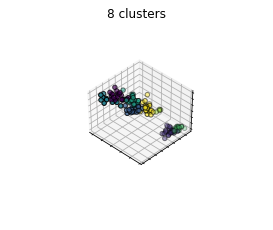

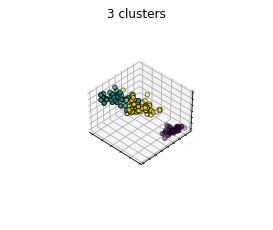

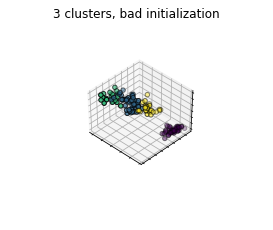

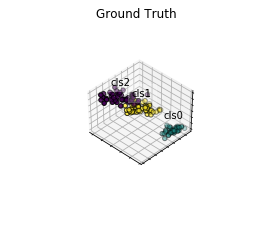

In [4]:
fignum = 1
titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))#第几个图像fignum（fignum的范围从1到numrows*numcols）
    ax = Axes3D(fig, rect=[0, 0, .9, 1], elev=48, azim=134)#Axes3D 绘制3D图形 FIG 圖 RECT 矩型 elev 高
    #elev=elev,azim=azim 改变绘制图像的视角,即相机的位置,azim沿着z轴旋转，elev沿着y轴
    ##elev表示上下旋转的角度
#azim表示平行旋转的角度
    ## fit data
    est.fit(X)#使用 OLS 物件的 fit() 方法來進行模型擬合
    
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2], #绘制散点图,改變顏色
               c=labels.astype(np.float), edgecolor='k') #edgecolor: 直方图边框颜色

    ax.w_xaxis.set_ticklabels([]) #刻度標籤的文本列表; 必須包含不可見標籤的值。
    ax.w_yaxis.set_ticklabels([])#刻度標籤的文本列表; 必須包含不可見標籤的值。
    ax.w_zaxis.set_ticklabels([])#刻度標籤的文本列表; 必須包含不可見標籤的值。
    ax.set_title(titles[fignum - 1])
    ax.dist = 20
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .9, 1], elev=48, azim=134) 

for name, label in [('cls0', 0),
                    ('cls1', 1),
                    ('cls2', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',#水平對齊
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w')) #bbox给标题增加外框  alpha明度，参数值0至1之间 facecolor背景颜色
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float) #將原本 label 順序的(0 1 2)改成(1 2 0) astype对数据类型进行转换    float浮点数 
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_title('Ground Truth')
ax.dist = 20

#fig.show()